## 1. Codeup Blog Articles

- Scrape the article text from the following pages:

    - https://codeup.com/codeups-data-science-career-accelerator-is-here/
    - https://codeup.com/data-science-myths/
    - https://codeup.com/data-science-vs-data-analytics-whats-the-difference/
    - https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair/
    - https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger/


- Encapsulate your work in a function named get_blog_articles that will return a list of dictionaries, with each dictionary representing one article. The shape of each dictionary should look like this:
    -  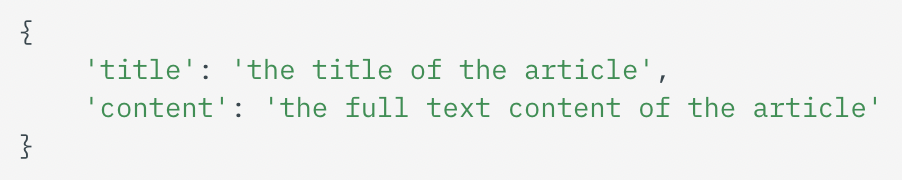
    
- Plus any additional properties you think might be helpful.

In [19]:
import requests
import bs4
import os
import pandas as pd

In [14]:
url = 'https://codeup.com/codeups-data-science-career-accelerator-is-here/'
headers = {'User-Agent': 'Codeup Data Science'} 
response = requests.get(url, headers=headers)
html = response.text
soup = bs4.BeautifulSoup(html)

In [30]:
website = soup.select('.jupiterx-content')[0]
website

<div class="jupiterx-content" itemprop="mainEntityOfPage" itemscope="itemscope" itemtype="http://schema.org/Blog" role="main"><article class="jupiterx-post post-619 post type-post status-publish format-standard has-post-thumbnail hentry category-data-science-2 tag-codeup tag-coding-bootcamp tag-coding-bootcamps-that-teach-data-science tag-data-science" id="619" itemprop="blogPost" itemscope="itemscope" itemtype="http://schema.org/BlogPosting"><header class="jupiterx-post-header"><h1 class="jupiterx-post-title" itemprop="headline">Codeup’s Data Science Career Accelerator is Here!</h1><ul class="jupiterx-post-meta list-inline"><li class="jupiterx-post-meta-date list-inline-item"><span>Posted on </span><time datetime="2018-09-30T05:26:22+00:00" itemprop="datePublished">September 30, 2018</time></li><li class="jupiterx-post-meta-categories list-inline-item"><span>In </span><a href="https://codeup.com/category/data-science-2/" rel="category">Data Science</a></li></ul></header><div class="ju

In [31]:
website.find('h1').text

'Codeup’s Data Science Career Accelerator is Here!'

In [32]:
website.find('p').text

'The rumors are true! The time has arrived. Codeup has officially opened applications to our new Data Science career accelerator, with only 25 seats available! This immersive program is one of a kind in San Antonio, and will help you land a job in\xa0Glassdoor’s #1 Best Job in America.'

___

In [44]:
url = 'https://codeup.com/data-science-myths/'
headers = {'User-Agent': 'Codeup Data Science'} 
response = requests.get(url, headers=headers)
html = response.text
soup = bs4.BeautifulSoup(html)

In [46]:
website = soup.select('.jupiterx-content')[0]

In [47]:
website.find('h1').text

'Data Science Myths'

In [54]:
website.find('p').text

'By Dimitri Antoniou and Maggie Giust'

___

In [ ]:
website_dict = {'title':[], 'content':[]}

In [ ]:
website_dict['title'] = soup.title.string

In [78]:
website_dict['content'] = website.text
website_dict

{'title': 'Data Science Myths - Codeup',
 'content': 'Data Science MythsPosted on October 31, 2018In Data ScienceBy Dimitri Antoniou and Maggie Giust\nData Science, Big Data, Machine Learning, NLP, Neural Networks…these buzzwords have rapidly spread into mainstream use over the last few years. Unfortunately, definitions are varied and sources of truth are limited. Data Scientists are in fact not magical unicorn wizards who can snap their fingers and turn a business around! Today, we’ll take a cue from our favorite Mythbusters to tackle some common myths and misconceptions in the field of Data Science.\n\xa0\nMyth #1: Data Science = Statistics\nAt first glance, this one doesn’t sound unreasonable. Statistics is defined as, “A branch of mathematics dealing with the collection, analysis, interpretation, and presentation of masses of numerical data.” That sounds a lot like our definition of Data Science: a method of drawing actionable intelligence from data. \nIn truth, statistics is actua

In [122]:
def get_website_info(urls):
    '''takes in a list of urls provided by the user
    creates and empty dictionary to hold upcoming info
    loop through the list of urls and
        scrape the webpage
        create a tasty little soup
        gather webpage information
        create title and content that will hold info from each url
            title takes in title of the webpage
            content hold all other info
    add title and content to the empty dictonary
    turn the dictionary into a data frame
    return said dataframe'''
    # set an empty dictionary to start
    dictionary = []
    # loops through list of urls
    for url in urls:
        # make header to gain access to webpage
        headers = {'User-Agent': 'Codeup Data Science'}
        # scrape the webpaage
        response = get(url, headers=headers)
        # takes URL and returns the soup object
        soup = BeautifulSoup(response.text)
        # find the full webpage info
        website = soup.find('div', class_='jupiterx-post-content')
        # create title and content that will hold the info
        website_info = {'title':[], 'content':[]}
        # adds title to webpage info
        website_info['title'] = soup.title.string
        # adds websites content to webpag info
        website_info['content'] = website.text
        # adds this dict of the website to the webpage info
        dictionary.append(website_info)
    # turn it into a dataframe
    dictionary = pd.DataFrame(dictionary)
    # return the new df
    return dictionary

In [123]:
urls = ['https://codeup.com/codeups-data-science-career-accelerator-is-here/',
        'https://codeup.com/data-science-myths/',
        'https://codeup.com/data-science-vs-data-analytics-whats-the-difference/',
        'https://codeup.com/10-tips-to-crush-it-at-the-sa-tech-job-fair/',
        'https://codeup.com/competitor-bootcamps-are-closing-is-the-model-in-danger/']
get_website_info(urls)

,title,content
0,Codeup’s Data Science Career Accelerator is He...,The rumors are true! The time has arrived. Cod...
1,Data Science Myths - Codeup,By Dimitri Antoniou and Maggie Giust\nData Sci...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch..."
3,10 Tips to Crush It at the SA Tech Job Fair - ...,SA Tech Job Fair\nThe third bi-annual San Anto...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...


## Question 1 Bonus:
- Scrape the text of all the websites linked on codeup's blog page. 

## 2. News Articles

- We will now be scraping text data from inshorts, a website that provides a brief overview of many different topics.

- Write a function that scrapes the news articles for the following topics:
    - Business
    - Sports
    - Technology
    - Entertainment
    
- The end product of this should be a function named get_news_articles that returns a list of dictionaries, where each dictionary has this shape:
    - 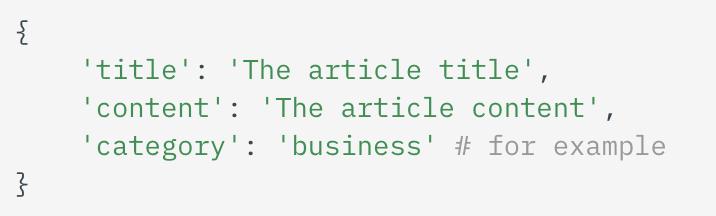
    
Hints:

1. Start by inspecting the website in your browser. Figure out which elements will be useful.
2. Start by creating a function that handles a single article and produces a dictionary like the one above.
3. Next create a function that will find all the articles on a single page and call the function you created in the last step for every article on the page.
4. Now create a function that will use the previous two functions to scrape the articles from all the pages that you need, and do any additional processing that needs to be done.

In [146]:
url = "https://inshorts.com/en/read"
response = requests.get(url)
html = response.text
soup = bs4.BeautifulSoup(html)


In [147]:
all_articles = soup.select(".card-stack")[0]

In [148]:
# process one card
article = all_articles.select(".news-card")[0]

In [149]:
title = article.find("span", attrs={'itemprop' : "headline"})
title.text

'Assam govt issues revised COVID-19 guidelines, shops & offices to shut down at 2 pm'

In [150]:
content = article.find("div", attrs={'itemprop' : "articleBody"})
content.text

'Assam government issued revised COVID-19 guidelines which shall come into force from 5 am on May 5 and remain in force until further orders. All shops, commercial establishments and offices shall shut down at 2 pm. No meeting/ gathering at any open or closed spaces shall be allowed. For marriages, only religious part will be allowed with maximum 20 people.'

In [151]:
author = article.select(".author")[0]
author.text

'Daisy Mowke'

In [152]:
time = article.select(".time")[0]
time['content']

'2021-05-04T13:27:59.000Z'

In [160]:
url = "https://inshorts.com/en/read"

def get_article_info(url):
    # scrape the webpage
    response = requests.get(url)
    html = response.text
    # create that tasty soup
    soup = bs4.BeautifulSoup(html)
    # find all articles
    all_articles = soup.select(".card-stack")[0]
    # look at an individual article
    article = all_articles.select(".news-card")[0]
    # find the title
    title = article.find("span", attrs={'itemprop' : "headline"})
    # set content
    content = article.find("div", attrs={'itemprop' : "articleBody"})
    # pull author
    author = article.select(".author")[0]
    # Get the time stamp
    time = article.select(".time")[0]
    # create a dictionary to hold title, content, author and time
    dictionary = {'title' : title.text, 'content' : content.text, 'author' : author.text, 'timestamp' : time['content']}
    # make the dictionary into a dataframe
    dictionary = pd.DataFrame([dictionary for article in all_articles])
    # return the new df
    return dictionary
get_article_info(url)

,title,content,author,timestamp
0,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z
1,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z
2,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z
3,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z
4,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z
5,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z
6,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z
7,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z
8,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z
9,"Assam govt issues revised COVID-19 guidelines,...",Assam government issued revised COVID-19 guide...,Daisy Mowke,2021-05-04T13:27:59.000Z


In [169]:
url = "https://inshorts.com/en/read"

def get_webpage_info(url):
    # scrape the webpage
    response = requests.get(url)
    html = response.text
    # create that tasty soup
    soup = bs4.BeautifulSoup(html)
    # find all articles
    all_articles = soup.select(".card-stack")[0]
    # look at an individual article
    article = all_articles.select(".news-card")[0]
    return article, all_articles

def get_article_info():
    article, all_articles = get_webpage_info(url)
    # find the title
    title = article.find("span", attrs={'itemprop' : "headline"})
    # set content
    content = article.find("div", attrs={'itemprop' : "articleBody"})
    # pull author
    author = article.select(".author")[0]
    # Get the time stamp
    time = article.select(".time")[0]
    # create a dictionary to hold title, content, author and time
    dictionary = {'title' : title.text, 'content' : content.text, 'author' : author.text, 'timestamp' : time['content']}
    dictionary = pd.DataFrame([dictionary for article in all_articles])
    return dictionary

In [170]:
get_article_info()

,title,content,author,timestamp
0,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z
1,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z
2,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z
3,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z
4,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z
5,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z
6,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z
7,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z
8,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z
9,Need for RT-PCR tests for healthy people trave...,The Indian Council of Medical Research (ICMR) ...,Sakshita Khosla,2021-05-04T15:03:55.000Z


In [159]:
url = "https://inshorts.com/en/read"

def get_article_info(url):
    # scrape the webpage
    response = requests.get(url)
    html = response.text
    # create that tasty soup
    soup = bs4.BeautifulSoup(html)
    # find all articles
    all_articles = soup.select(".card-stack")[0]
    # look at an individual article
    article = all_articles.select(".news-card")[0]
    # find the title
    title = article.find("span", attrs={'itemprop' : "headline"})
    # set content
    content = article.find("div", attrs={'itemprop' : "articleBody"})
    # pull author
    author = article.select(".author")[0]
    # Get the time stamp
    time = article.select(".time")[0]
    # create a dictionary to hold title, content, author and time
    dictionary = {'title' : title.text, 'content' : content.text, 'author' : author.text, 'timestamp' : time['content']}
    # make the dictionary into a dataframe
    dictionary = pd.DataFrame(dictionary)
    # return the new df
    return dictionary

get_article_info(url)

ValueError: If using all scalar values, you must pass an index

## 3. Bonus: cache the data

- Write your code such that the acquired data is saved locally in some form or fashion. Your functions that retrieve the data should prefer to read the local data instead of having to make all the requests everytime the function is called. Include a boolean flag in the functions to allow the data to be acquired "fresh" from the actual sources (re-writing your local cache).